# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | talas
Processing Record 2 of Set 1 | kinkala
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | hamilton
Processing Record 6 of Set 1 | kailua-kona
Processing Record 7 of Set 1 | aykhal
Processing Record 8 of Set 1 | mount pearl
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | weno
Processing Record 13 of Set 1 | praia da vitoria
Processing Record 14 of Set 1 | west island
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | guadalajara
Processing Record 17 of Set 1 | constantia
Processing Record 18 of Set 1 | quellon
Processing Record 19 of Set 1 | chhachhrauli
Processing Record 20 of Set 1 | hasaki
Processing Record 21 of Set 1 | yanchep
Processing Record 22 of Set 1 | port mathurin
Pro

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,talas,38.6908,35.5538,-0.63,80,0,0.00,TR,1710298812
1,kinkala,-4.3614,14.7644,23.22,84,57,0.72,CG,1710298919
2,adamstown,-25.0660,-130.1015,25.83,77,94,3.75,PN,1710298920
3,edinburgh of the seven seas,-37.0676,-12.3116,16.85,83,100,9.28,SH,1710298673
4,hamilton,39.1834,-84.5333,14.43,45,0,2.57,US,1710298478


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talas,38.6908,35.5538,-0.63,80,0,0.00,TR,1710298812
1,kinkala,-4.3614,14.7644,23.22,84,57,0.72,CG,1710298919
2,adamstown,-25.0660,-130.1015,25.83,77,94,3.75,PN,1710298920
3,edinburgh of the seven seas,-37.0676,-12.3116,16.85,83,100,9.28,SH,1710298673
4,hamilton,39.1834,-84.5333,14.43,45,0,2.57,US,1710298478


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

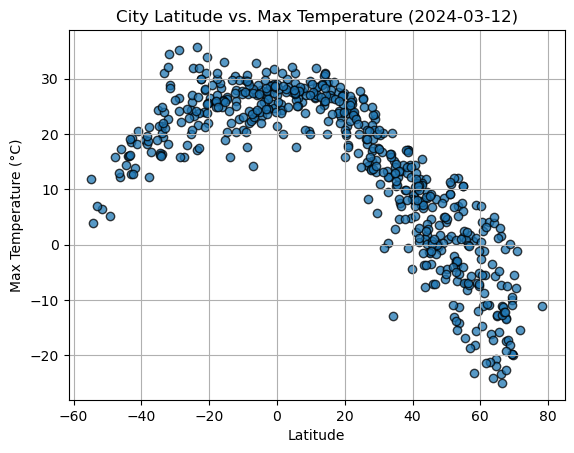

In [8]:
# Build scatter plot for latitude vs. temperature

# Get the max date from DataFrame
date = time.strftime('%Y-%m-%d', time.localtime(city_data_df["Date"].max()))

# Scatter plot for Latitude vs. Max Temperature on the current date
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

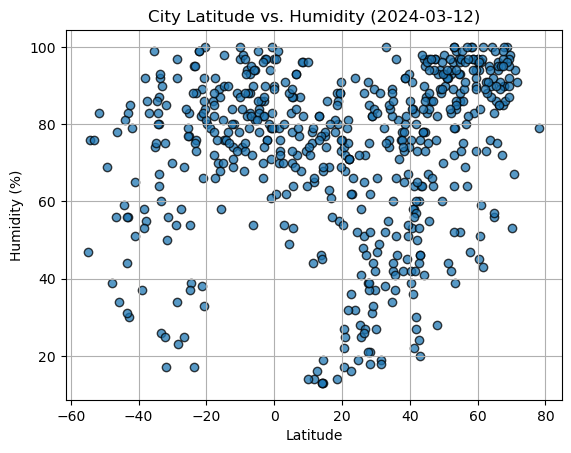

In [9]:
# Build the scatter plots for latitude vs. cloudiness

# Get the max date from DataFrame
date = time.strftime('%Y-%m-%d', time.localtime(city_data_df["Date"].max()))

# Scatter plot for Latitude vs. Humidity on the current date
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

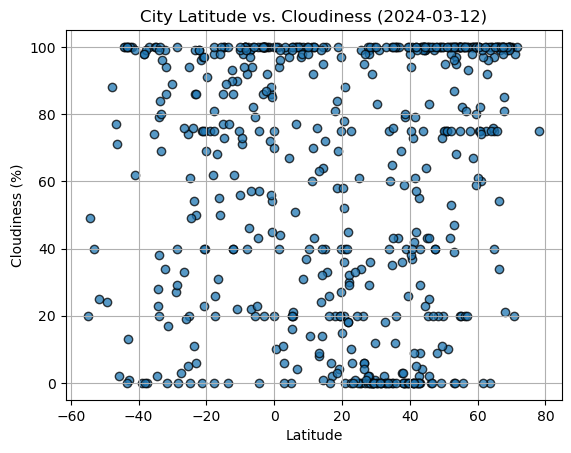

In [10]:
# Build the scatter plots for latitude vs. cloudiness

# Get the max date from DataFrame
date = time.strftime('%Y-%m-%d', time.localtime(city_data_df["Date"].max()))

# Scatter plot for Latitude vs. Cloudiness on the current date
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

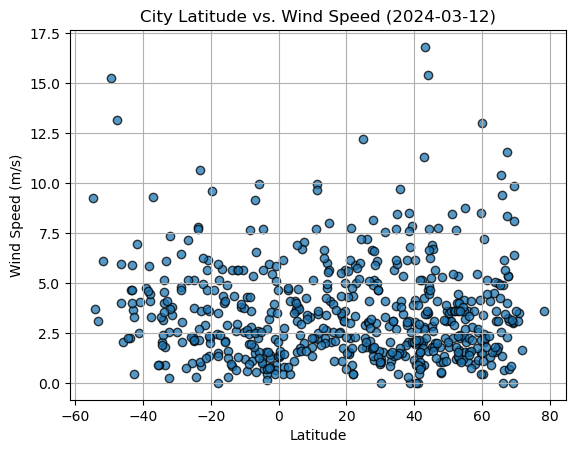

In [23]:
# Build the scatter plots for latitude vs. wind speed

# Get the max date from DataFrame
date = time.strftime('%Y-%m-%d', time.localtime(city_data_df["Date"].max()))

# Scatter plot for Latitude vs. Wind Speed on the current date
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(source_df, target_col, title, x_label = "Latitude", line_position = 0, file_path = None):

    # Retrieving series for x and y axes
    x_values = source_df.Lat
    y_values = source_df[target_col]

    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Create a scatter plot
    plt.scatter(x_values, y_values, s=50, color="SteelBlue")

    # Plot the regression line
    plt.plot(x_values, regress_values, "r-", label=line_eq)

    # Annotate the line equation
    plt.annotate(line_eq, line_position, fontsize=15, color="red")

    # Set labels and title
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(target_col)

    # Show the correlation coefficient
    print(f"The r-value is: {rvalue}")

    # Save the figure
    plt.savefig(file_path)

    # Show the plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talas,38.6908,35.5538,-0.63,80,0,0.00,TR,1710298812
4,hamilton,39.1834,-84.5333,14.43,45,0,2.57,US,1710298478
5,kailua-kona,19.6406,-155.9956,27.50,73,40,3.60,US,1710298649
6,aykhal,66.0000,111.5000,-23.35,96,100,1.33,RU,1710298920
7,mount pearl,47.5166,-52.7813,-0.38,97,40,1.03,CA,1710298921


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kinkala,-4.3614,14.7644,23.22,84,57,0.72,CG,1710298919
2,adamstown,-25.0660,-130.1015,25.83,77,94,3.75,PN,1710298920
3,edinburgh of the seven seas,-37.0676,-12.3116,16.85,83,100,9.28,SH,1710298673
8,blackmans bay,-43.0167,147.3167,18.62,56,13,3.64,AU,1710298921
13,west island,-12.1568,96.8225,27.99,74,40,5.66,CC,1710298714


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.898824884837997


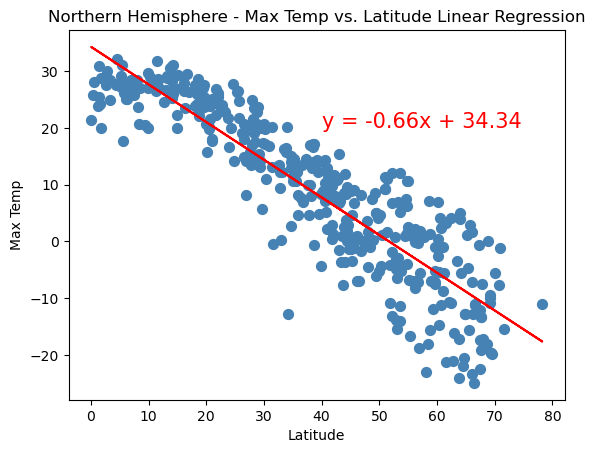

In [27]:
# Linear regression on Northern Hemisphere

plot_linear_regression(northern_hemi_df, "Max Temp", "Northern Hemisphere - Max Temp vs. Latitude Linear Regression", line_position=(40, 20), file_path="output_data/Northern_Hemisphere_Max_Temp_vs_Latitude.png")

The r-value is: 0.627507590698252


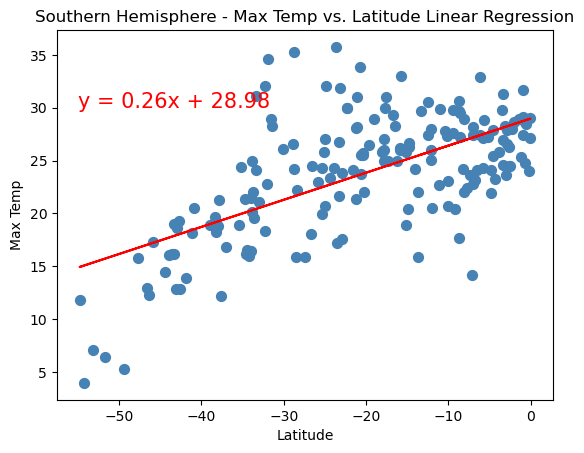

In [30]:
# Linear regression on Southern Hemisphere

plot_linear_regression(southern_hemi_df, "Max Temp", "Southern Hemisphere - Max Temp vs. Latitude Linear Regression", line_position=(-55, 30), file_path="output_data/Southern_Hemisphere_Max_Temp_vs_Latitude.png")

`Max Temperature vs. Latitude`

The linear regression analysis for the **Northern Hemisphere** indicates a strong negative correlation between latitude and maximum temperature, the correlation coefficient is `r=-0.90`. As we move away from the equator towards higher latitudes, there is a discernible decrease in maximum temperatures. The regression line provides an approximate trend, suggesting that cities at higher latitudes tend to experience lower maximum temperatures.

Conversely, in the **Southern Hemisphere**, there is a positive correlation between latitude and maximum temperature, however, the correlation coefficient is `r=-0.63` is lower than for the northern hemisphere and shows moderate correlation. Cities closer to the equator generally exhibit higher maximum temperatures. The regression line helps illustrate this relationship, indicating that as we move towards the equator, maximum temperatures tend to increase.

These observations align with the expected patterns based on the Earth's axial tilt and its influence on seasonal variations in temperature. The pattern is stronger in the **Northern Hemisphere**.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.33510190032354564


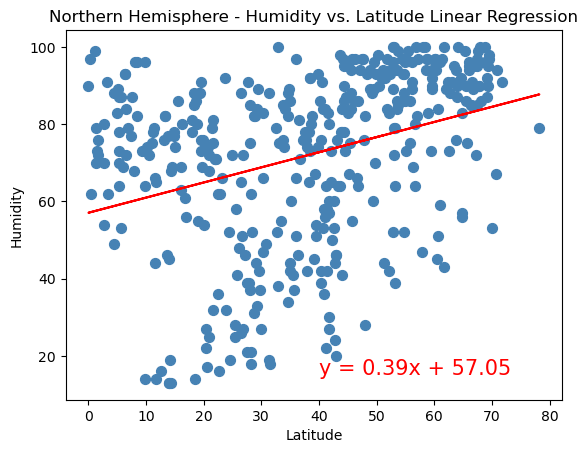

In [31]:
# Northern Hemisphere

plot_linear_regression(northern_hemi_df, "Humidity", "Northern Hemisphere - Humidity vs. Latitude Linear Regression", line_position=(40, 15), file_path="output_data/Northern_Hemisphere_Humidity_vs_Latitude.png")

The r-value is: 0.4175025995237921


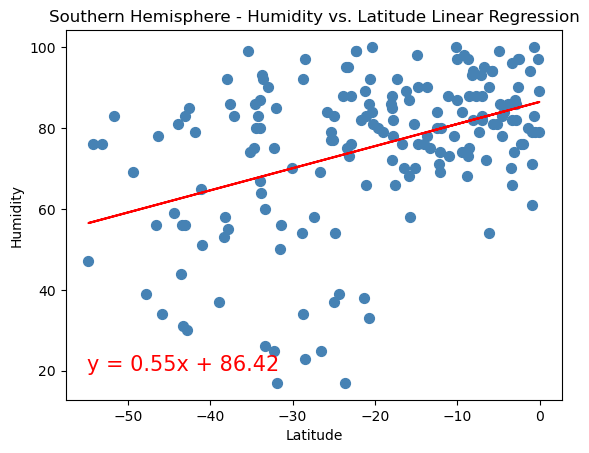

In [32]:
# Southern Hemisphere

plot_linear_regression(southern_hemi_df, "Humidity", "Southern Hemisphere - Humidity vs. Latitude Linear Regression", line_position=(-55, 20), file_path="output_data/Southern_Hemisphere_Humidity_vs_Latitude.png")

`Humidity vs. Latitude`:

The linear regression analysis for the **Northern Hemisphere** indicates a weak positive correlation between latitude and humidity, the correlation coefficient is `r=0.34`. As we move away from the equator towards higher latitudes, there is a small increase in humidity. The regression line provides an approximate trend, suggesting that cities at higher latitudes tend to experience higher humidity.

However, in the **Southern Hemisphere**, there is also a positive weak correlation between latitude and humidity, the correlation coefficient `r=0.42`. Cities closer to the equator generally exhibit higher humidity. The regression line helps illustrate this relationship, indicating that as we move towards the equator, hunidity tends to increase. 

These observations look contradicting to each other, but taking into account that a number of cities in the southern hemisphere close to the South Pole is far lower than a number of cities in the northern hemisphere closer to the North Pole, we have a biased set. Therefore, those trends cannot be considered as 100% valid, which is also confirmed by low correlation coefficient values.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.28662320303174355


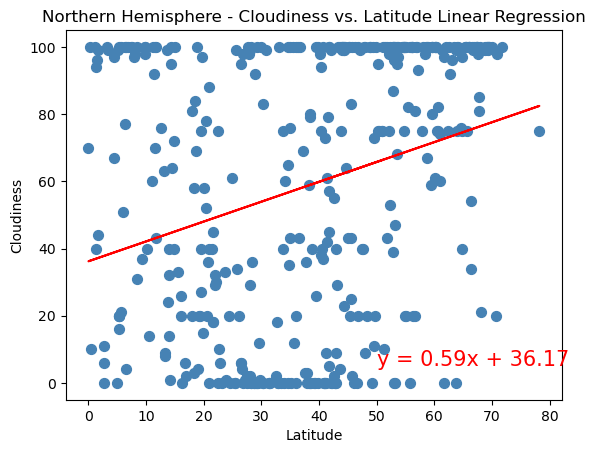

In [34]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere for Cloudiness
plot_linear_regression(northern_hemi_df, "Cloudiness", "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression", line_position=(50, 5), file_path="output_data/Northern_Hemisphere_Cloudiness_vs_Latitude.png")

The r-value is: 0.23306955828412215


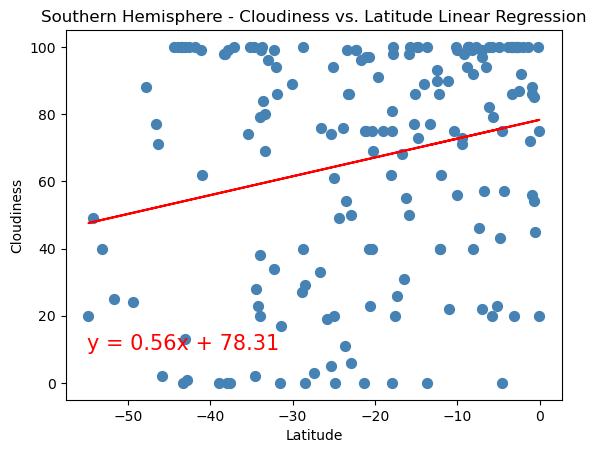

In [35]:
# Southern Hemisphere

plot_linear_regression(southern_hemi_df, "Cloudiness", "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression", line_position=(-55, 10), file_path="output_data/Southern_Hemisphere_Cloudiness_vs_Latitude.png")

`Cloudiness vs. Latitude`:

The linear regression analysis both for the **Northern Hemisphere** and the **Southern Hemisphere** indicates none or very week correlation between latitude and cloudiness, the correlation coefficients are `r=0.29` and `r=0.23` respectively. Thus, we can consider that there is no statistically significant dependency between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0014307770562095759


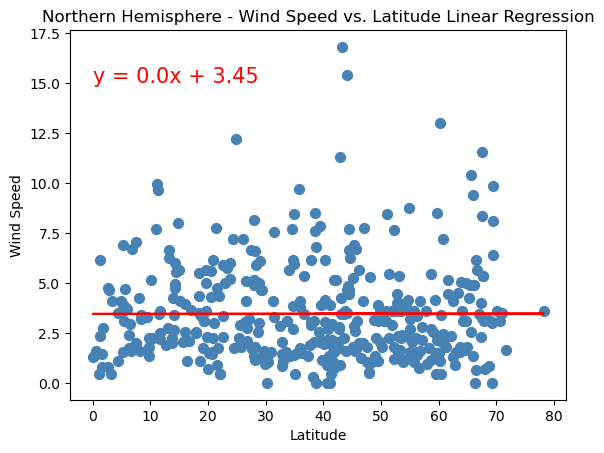

In [37]:
# Northern Hemisphere
# Linear regression for Latitude vs. Wind Speed in the Northern Hemisphere

plot_linear_regression(northern_hemi_df, "Wind Speed", "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression", line_position=(0, 15), file_path="output_data/Northern_Hemisphere_Wind_Speed_vs_Latitude.png")

The r-value is: -0.2757063316365023


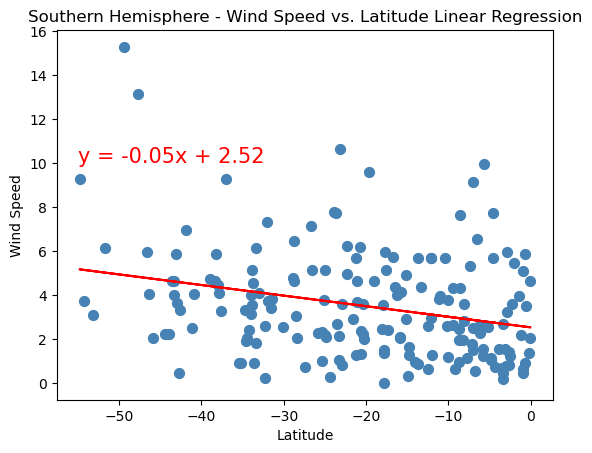

In [38]:
# Southern Hemisphere
# Linear regression for Latitude vs. Wind Speed in the Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Wind Speed", "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression", line_position=(-55, 10), file_path="output_data/Southern_Hemisphere_Wind_Speed_vs_Latitude.png")

`Wind speed vs. Latitude`:

The linear regression analysis both for the **Northern Hemisphere** and the **Southern Hemisphere** indicates none or very week correlation between latitude and wind speed, the correlation coefficients are `r=0.001` and `r=-0.28` respectively. Thus, we can consider that there is no statistically significant dependency between latitude and wind speed.